In [1]:
import json 
from tqdm import tqdm

with open('results/vrd2/test_predict_0.025327813831370612.json') as f:
    results = json.load(f)

pred_strs = list(results[0]['pred_count'].keys())
print(len(pred_strs))

50


In [2]:
pred_count = {k:[0,0] for k in pred_strs}
for res in results:
    for pred in res['pred_count']:
        pred_count[pred][0] += res['pred_count'][pred][0]
        pred_count[pred][1] += res['pred_count'][pred][1]

pred_strs = list(pred_count.keys())
print(len(pred_strs))

50


In [3]:
import numpy as np

pred_count_np = np.array(list(pred_count.values()))
print(np.sum(pred_count_np[:,0]))
print(np.sum(pred_count_np[:,1]))
idx = np.argsort(pred_count_np[:,1])
idx = idx[::-1]
display(idx)
pred_count_np = pred_count_np[idx]
pred_strs = np.array(pred_strs)[idx]

print([(pred_strs[i], pred_count_np[i,0], pred_count_np[i,1]) for i in idx])

10378
118776


array([42, 27, 29, 44, 10, 47, 41, 19, 23, 12, 32, 35, 36, 26, 13,  6,  8,
        9,  2, 38, 30,  3, 11, 16, 21, 15, 25, 31,  4, 24,  0, 39, 43, 37,
       22, 40, 49, 33, 18, 17, 14, 34, 48,  5, 28, 45,  7, 46,  1, 20])

[('painted on', 0, 68), ('eating', 12, 177), ('between', 0, 165), ('across', 0, 50), ('above', 33, 1408), ('playing', 0, 24), ('walking in', 0, 77), ('carrying', 20, 434), ('watching', 6, 257), ('under', 34, 1181), ('covering', 0, 145), ('along', 0, 118), ('mounted on', 0, 117), ('laying on', 0, 187), ('riding', 23, 979), ('with', 16, 3833), ('holding', 279, 2847), ('wears', 0, 1636), ('wearing', 1892, 13290), ('to', 0, 100), ('and', 0, 165), ('of', 788, 12727), ('sitting on', 19, 1379), ('attached to', 0, 540), ('over', 3, 354), ('standing on', 13, 841), ('for', 8, 244), ('using', 0, 149), ('in', 372, 6834), ('looking at', 0, 246), ('on', 4879, 38909), ('lying on', 0, 91), ('growing on', 0, 65), ('part of', 0, 105), ('hanging from', 0, 262), ('from', 0, 82), ('flying in', 0, 8), ('covered in', 24, 137), ('belonging to', 0, 485), ('at', 34, 491), ('in front of', 24, 938), ('on back of', 0, 118), ('says', 0, 11), ('near', 305, 5133), ('parked on', 0, 168), ('against', 0, 49), ('behind',

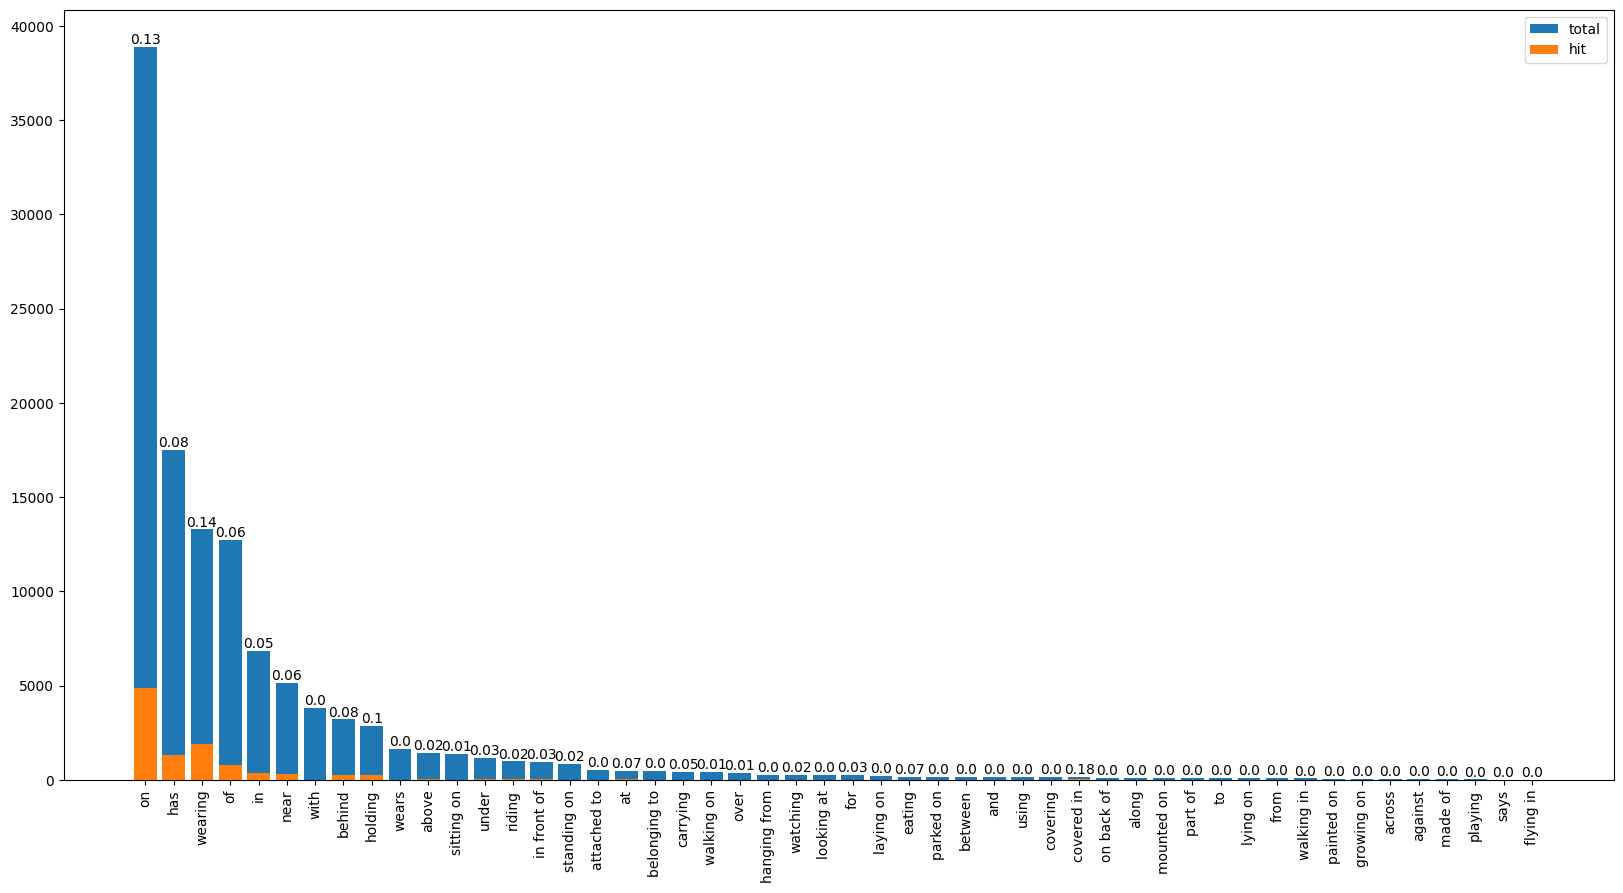

In [4]:
import matplotlib.pyplot as plt

# Plot histogram of relation hit count and total count
plt.figure(figsize=(20,10))
plt.bar(range(len(pred_count)), pred_count_np[:,1])
plt.bar(range(len(pred_count)), pred_count_np[:,0])
# Group the relation into common and rare and sum up the counts into one bar
# total = np.array([np.sum(pred_count_np[:1,1]), np.sum(pred_count_np[1:,1])])
# hit = np.array([np.sum(pred_count_np[:1,0]), np.sum(pred_count_np[1:,0])])
# plt.bar(range(2), total)
# plt.bar(range(2), hit)
plt.legend(['total', 'hit'])
# add number labels
for i in range(len(pred_count)):
    # plt.text(i, pred_count_np[i,1], str(pred_count_np[i,1]), ha='center', va='bottom')
    # plt.text(i, pred_count_np[i,0], str(pred_count_np[i,0]), ha='center', va='bottom')
    plt.text(i, pred_count_np[i,1], str(round(pred_count_np[i,0]/pred_count_np[i,1], 2)), ha='center', va='bottom')
# for i in range(2):
#     plt.text(i, total[i], str(round(hit[i]/total[i], 2)), ha='center', va='bottom')
plt.xticks(range(len(pred_count)), pred_strs, rotation=90)
plt.show()

In [5]:
label_data = json.load(open('/data/hulab/zcai75/visual_genome/vg_motif_anno/VG-SGG-dicts-with-attri.json'))
print(pred_strs)
print([label_data['predicate_to_idx'][p] for p in pred_strs])

['on' 'has' 'wearing' 'of' 'in' 'near' 'with' 'behind' 'holding' 'wears'
 'above' 'sitting on' 'under' 'riding' 'in front of' 'standing on'
 'attached to' 'at' 'belonging to' 'carrying' 'walking on' 'over'
 'hanging from' 'watching' 'looking at' 'for' 'laying on' 'eating'
 'parked on' 'between' 'and' 'using' 'covering' 'covered in' 'on back of'
 'along' 'mounted on' 'part of' 'to' 'lying on' 'from' 'walking in'
 'painted on' 'growing on' 'across' 'against' 'made of' 'playing' 'says'
 'flying in']
[31, 20, 48, 30, 22, 29, 50, 8, 21, 49, 1, 40, 43, 38, 23, 41, 7, 6, 9, 11, 46, 33, 19, 47, 25, 16, 24, 14, 35, 10, 5, 44, 13, 12, 32, 4, 28, 36, 42, 26, 17, 45, 34, 18, 2, 3, 27, 37, 39, 15]


In [6]:
# img_id = 2343728
# res_idx = [i for i, res in enumerate(results) if res['img_id'] == img_id]
res_idx = 17
res = results[res_idx]
img_id = int(res['img_id'])
print(img_id)

2343710


In [7]:
import csv

dataset_file = '/data/hulab/zcai75/OFA_data/sgcls/vg_val_full.tsv'
# get the line in the dataset file that corresponds to the res_idx
with open(dataset_file) as f:
    reader = csv.reader(f, delimiter='\t')
    for i, row in enumerate(reader):
        if i == res_idx:
            break

uniq_id, pred_ids, box_ids, box_range, img_rels, boxes, pred_label, box_label, img_str = row

boxes = [b.split(' ') for b in boxes.split(',')]
print(boxes)


[['561', '295', '875', '590'], ['63', '258', '127', '517'], ['502', '332', '816', '588'], ['982', '515', '80', '216'], ['984', '567', '76', '95'], ['757', '570', '267', '31'], ['941', '505', '154', '220'], ['59', '462', '39', '111'], ['799', '422', '31', '89'], ['94', '460', '27', '103'], ['982', '605', '76', '33'], ['1005', '104', '33', '91'], ['751', '283', '177', '54'], ['199', '543', '54', '101'], ['459', '572', '80', '127'], ['753', '284', '275', '451'], ['971', '522', '93', '263'], ['968', '598', '99', '74'], ['963', '501', '105', '228'], ['980', '565', '80', '103'], ['981', '547', '62', '97'], ['969', '555', '93', '105']]


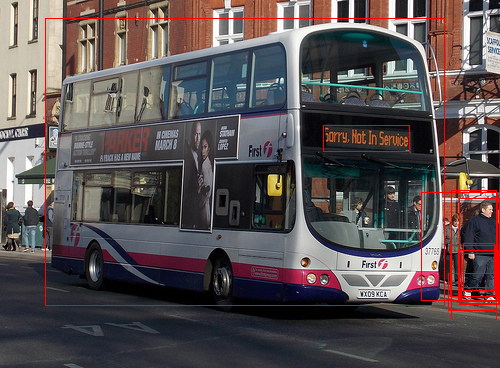

[['pole', 'near', 'bus'],
 ['car', 'near', 'bus'],
 ['window', 'on', 'building'],
 ['tire', 'on', 'bus'],
 ['window', 'on', 'building'],
 ['street', 'in front of', 'bus'],
 ['window', 'on', 'building'],
 ['pole', 'on', 'street'],
 ['bus', 'on', 'street'],
 ['car', 'on', 'street'],
 ['car', 'on', 'street'],
 ['light', 'on', 'street'],
 ['light', 'on', 'street'],
 ['pole', 'in front of', 'building'],
 ['bus', 'in front of', 'building'],
 ['car', 'near', 'building'],
 ['window', 'on', 'building'],
 ['car', 'in front of', 'building'],
 ['window', 'on', 'building'],
 ['sidewalk', 'in front of', 'building'],
 ['street', 'in front of', 'building'],
 ['window', 'on', 'building'],
 ['pole', 'has', 'sign'],
 ['pole', 'has', 'sign'],
 ['car', 'in front of', 'building'],
 ['car', 'near', 'window'],
 ['car', 'in front of', 'building'],
 ['sidewalk', 'in front of', 'building'],
 ['street', 'in front of', 'window'],
 ['curtain', 'on', 'window'],
 ['pole', 'has', 'sign'],
 ['bus', 'has', 'window'],
 [

[['sign', 'on', 'bus'],
 ['man', 'wearing', 'shoe'],
 ['man', 'wearing', 'shoe'],
 ['man', 'wearing', 'pant'],
 ['man', 'wearing', 'pant'],
 ['man', 'wearing', 'jean'],
 ['man', 'wearing', 'pant'],
 ['man', 'wearing', 'jean']]

In [8]:
import requests
from PIL import Image, ImageDraw
from io import BytesIO
import h5py

# img_id = 2376019
img_data_dict = json.load(open('/data/hulab/zcai75/visual_genome/vg_motif_anno/image_data.json'))
idx_by_id = {img_data['image_id']: i for i, img_data in enumerate(img_data_dict)}
j=idx_by_id[img_id]
img_data = img_data_dict[j]
raw = requests.get(img_data['url']).content
image = Image.open(BytesIO(raw))

ann = h5py.File('/data/hulab/zcai75/visual_genome/vg_motif_anno/VG-SGG-with-attri.h5', 'r')
label_data = json.load(open('/data/hulab/zcai75/visual_genome/vg_motif_anno/VG-SGG-dicts-with-attri.json'))
first_rel = ann['img_to_first_rel'][j]
last_rel = ann['img_to_last_rel'][j]
img_rels = ann['relationships'][first_rel : last_rel+1]
box1_ids = [ann['labels'][i][0] for i in img_rels[:, 0]]
box2_ids = [ann['labels'][i][0] for i in img_rels[:, 1]]
pred_ids = ann['predicates'][first_rel : last_rel+1]
pred_label = [label_data['idx_to_predicate'][str(i[0])].encode('utf-8') for i in pred_ids]
box1_label = [label_data['idx_to_label'][str(i)].encode('utf-8') for i in box1_ids]
box2_label = [label_data['idx_to_label'][str(i)].encode('utf-8') for i in box2_ids]
max_image_size = max(image.size)
# display(list(zip(box1_label, pred_label, box2_label)))

box_ids = sorted(set(img_rels[:, 0].tolist() + img_rels[:, 1].tolist()))
boxes_2 = ann['boxes_1024'][box_ids].tolist()
# display(boxes_2)

# draw in the boxes
scale = max_image_size / 1024
draw = ImageDraw.Draw(image)
for box in boxes_2:
    box = [float(b) for b in box]
    box = [box[0]*scale, box[1]*scale, box[2]*scale, box[3]*scale]
    # convert from center to corner
    box = [box[0]-box[2]/2, box[1]-box[3]/2, box[0]+box[2]/2, box[1]+box[3]/2]
    # box = [box[0]-box[2]/2, box[1]-box[3]/2, box[0]+box[2]/2, box[1]+box[3]/2]
    draw.rectangle(box, outline='red')
display(image)

display(res['hyp'])
display(res['ref'])

In [9]:
# pred_labels = ann['predicates'][first_rel : last_rel+1].squeeze().tolist()
# boxes = {bid: ann['boxes_1024'][bid].squeeze().tolist() for bid in box_ids}
# box_labels = {bid: ann['labels'][bid].squeeze().tolist() for bid in box_ids}
# pred_slabels = [label_data['idx_to_predicate'][str(j)] for j in pred_labels]
# box_slabels = [label_data['idx_to_label'][str(j)] for j in box_labels.values()]

# dic = {}
# # print(self.dataset[index][:-1])
# for j, rel in enumerate(img_rels):
#     pred = pred_labels[j]
#     if rel[0] not in dic:
#         dic[rel[0]] = {rel[1]: pred}
#     else:
#         dic[rel[0]][rel[1]] = pred

# # write one data point for each object in the image and the relationships it participates in
# for sub in box_ids:
#     objs = dic[sub].keys() if sub in dic else []
#     pred_labels = dic[sub].values() if sub in dic else []
#     obj_boxes = [boxes[bid] for bid in objs]
#     obj_labels = [box_labels[bid] for bid in objs]
#     pred_slabels = [label_data['idx_to_predicate'][str(i)] for i in pred_labels]
#     obj_slabels = [label_data['idx_to_label'][str(i)] for i in obj_labels]
#     sub_label = box_labels[sub]
#     sub_slabel = label_data['idx_to_label'][str(sub_label)]
#     sub_box = boxes[sub]

#     row = [img_id,
#         ','.join(map(str, pred_labels)),
#         ','.join(map(str, objs)),
#         ','.join([' '.join(map(str, box)) for box in obj_boxes]),
#         ','.join(pred_slabels),
#         ','.join(obj_slabels),
#         sub, sub_slabel, ' '.join(map(str, sub_box))]
#     print(row)

In [10]:
# def coord2bin(coord_list, box_size, w, h, max_img_size, num_bins):
#     # coord / box_size(1024) * max_img_size / w_or_h
# 	bin_list = []
# 	bin_list += [(int(round(coord_list[0] / box_size * max_img_size / w * (num_bins - 1))))]
# 	bin_list += [(int(round(coord_list[1] / box_size * max_img_size / h * (num_bins - 1))))]
# 	bin_list += [(int(round(coord_list[2] / box_size * max_img_size / w * (num_bins - 1))))]
# 	bin_list += [(int(round(coord_list[3] / box_size * max_img_size / h * (num_bins - 1))))]
# 	return bin_list

# def coord2bin_old(coord_list, box_size, num_bins):
# 	bin_list = []
# 	bin_list += [(int(round(coord_list[0] / box_size * (num_bins - 1))))]
# 	bin_list += [(int(round(coord_list[1] / box_size * (num_bins - 1))))]
# 	bin_list += [(int(round(coord_list[2] / box_size * (num_bins - 1))))]
# 	bin_list += [(int(round(coord_list[3] / box_size * (num_bins - 1))))]
# 	return bin_list

# box = boxes_2[3]
# box = [box[0]-box[2]/2, box[1]-box[3]/2, box[0]+box[2]/2, box[1]+box[3]/2]
# bins_1 = coord2bin(box, 1024, image.size[0], image.size[1], max_image_size, 1000)
# print(bins_1)
# bins_2 = coord2bin_old(box, 1024, 1000)
# print(bins_2)
# image = Image.open(BytesIO(raw))
# image = image.resize((1000, 1000))
# draw = ImageDraw.Draw(image)
# draw.rectangle(bins_1, outline='red')
# draw.rectangle(bins_2, outline='blue')
# image = image.resize((500, 500))
# display(image)


22880it [00:00, 29887.19it/s]


{0: 0.2, 1: 0.25, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.25, 8: 0.0, 9: 0.0, 10: 0.14285714285714285, 11: 0.0, 12: 0.42857142857142855, 13: 0.4, 14: 0.0, 15: 0.14285714285714285, 16: 0.0, 17: 0.0, 18: 0.0, 19: 1.0, 20: 0.0, 21: 0.0, 22: 0.16666666666666666, 23: 0.0, 24: 0.2, 25: 0.6, 26: 0.0, 27: 0.0, 28: 0.2, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.3, 45: 0.0, 46: 0.0, 47: 0.3333333333333333, 48: 0.0, 49: 0.25, 50: 0.0, 51: 0.0, 52: 0.125, 53: 0.3333333333333333, 54: 0.3333333333333333, 55: 0.375, 56: 0.0, 57: 0.0, 58: 0.3333333333333333, 59: 0.0, 60: 0.0, 61: 0.3333333333333333, 62: 0.6666666666666666, 63: 0.14285714285714285, 64: 0.3333333333333333, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.16666666666666666, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.14285714285714285, 77: 0.0, 78: 0.0, 79: 0.14285714285714285, 80: 0.2222222222222222, 81: 0.0, 82: 0.0, 83: 0.0

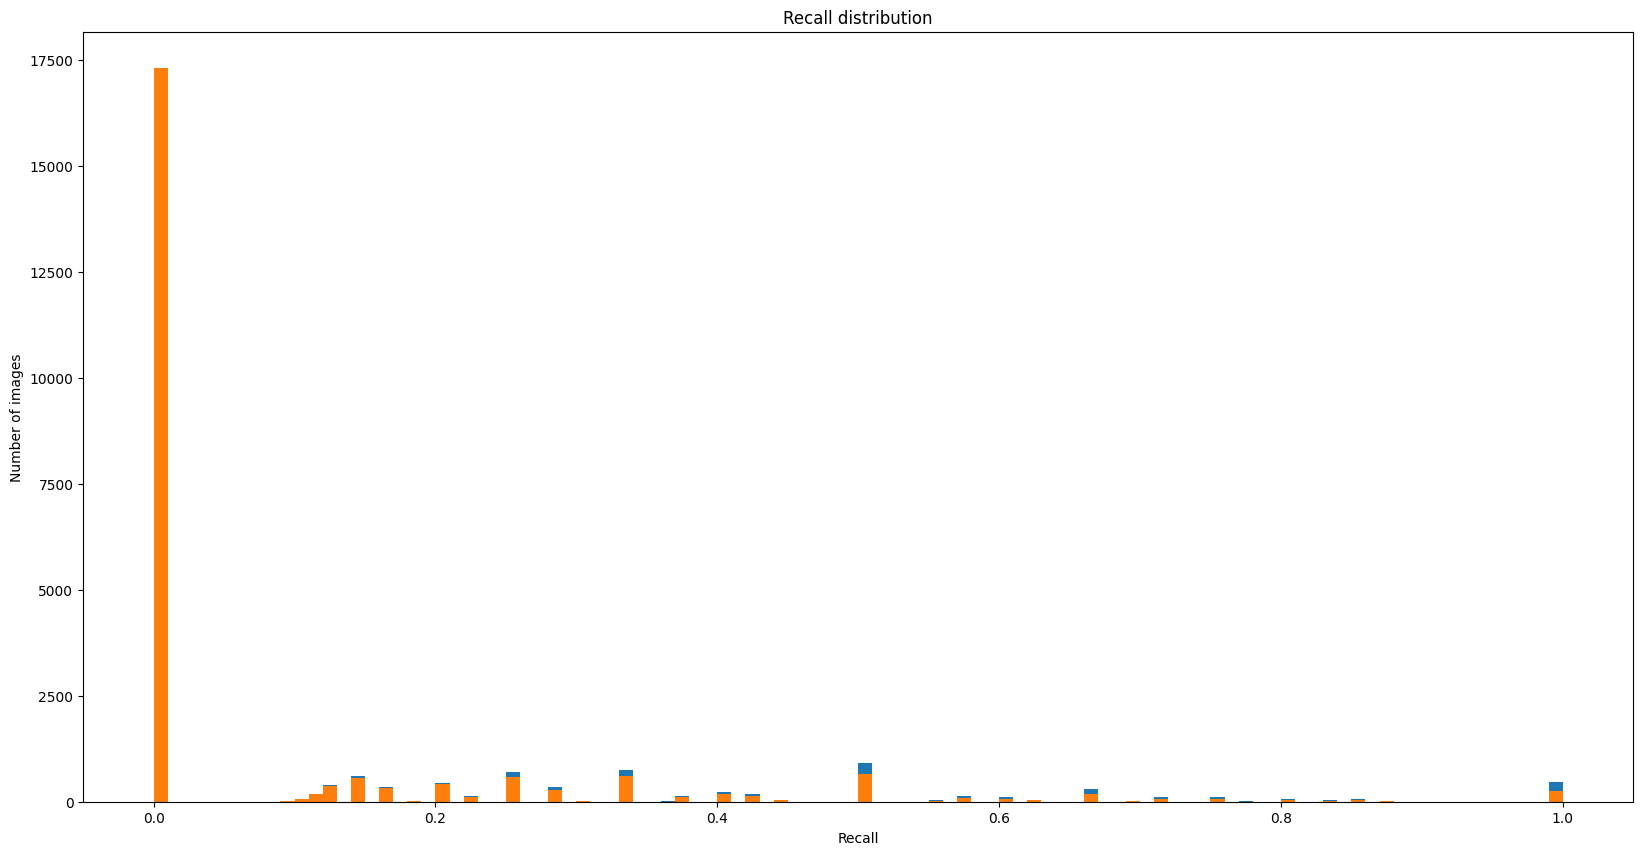

In [11]:
def calculate_recall(hyp, ref, pred_count):
    matches = []
    for r in ref:
        for h in hyp:
            if len(h) != 3 or len(r) != 3:
                print(h, r)
                continue
            if h[0] == r[0] and h[1] == r[1] and h[2] == r[2]:
                matches.append(h)
                break
    for match in matches:
        pred_count[match[1]][0] += 1 if match[1] in pred_count else 0
    for r in ref:
        if r[1] in pred_count:
            pred_count[r[1]][1] += 1
        if r[1] not in pred_count:
            print(r)
    # for p in pred_count:
    #     assert pred_count[p][0] <= pred_count[p][1], pred_count
    return len(matches) / len(ref)

def calculate_obj_recall(hyp, ref):
    matches = []
    for r in ref:
        for h in hyp:
            if len(h) != 3 or len(r) != 3:
                print(h, r)
                continue
            if h[0] == r[0] and h[2] == r[2]:
                matches.append(h)
                break
    return len(matches) / len(ref)

recalls_by_id = {}
obj_recalls_by_id = {}
pred_count = {k:[0,0] for k in pred_strs}
for i, res in tqdm(enumerate(results)):
    hyp = res['hyp']
    ref = res['ref']
    recall = calculate_recall(hyp, ref, pred_count)
    recalls_by_id[i] = recall
    obj_recall = calculate_obj_recall(hyp, ref)
    obj_recalls_by_id[i] = obj_recall

print(recalls_by_id)
# plot histogram of the recall distribution and overlay object recall distribution
plt.figure(figsize=(20,10))
plt.hist(list(obj_recalls_by_id.values()), bins=100)
plt.hist(list(recalls_by_id.values()), bins=100)
plt.xlabel('Recall')
plt.ylabel('Number of images')
plt.title('Recall distribution')
plt.show()

0it [00:00, ?it/s]

22880it [00:00, 54543.28it/s]


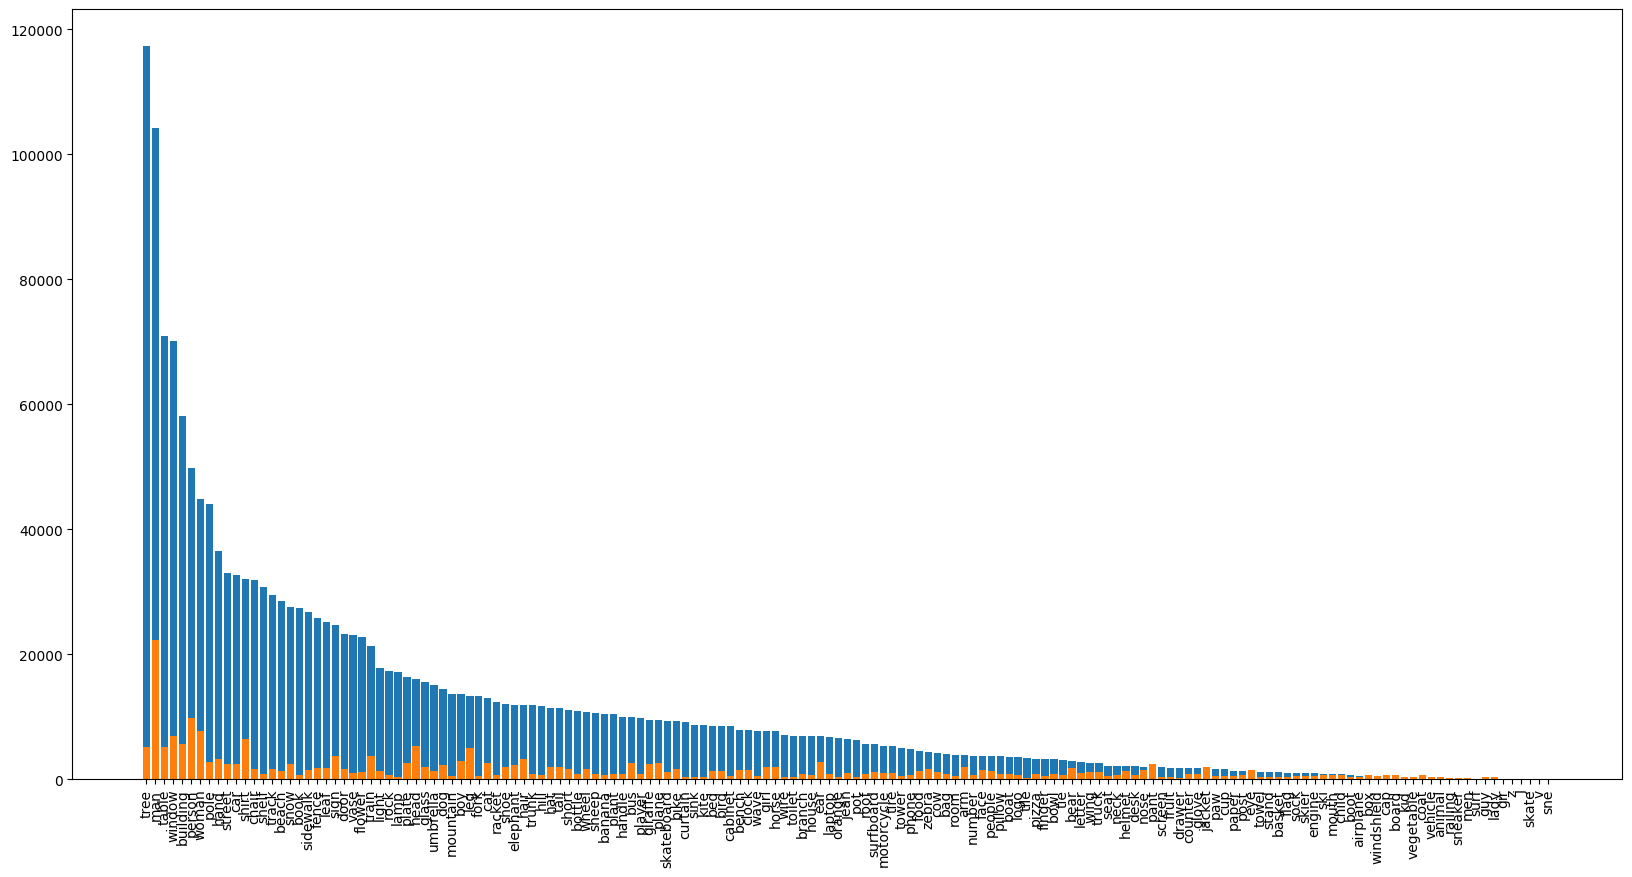

In [27]:
hyp_obj_count = {}
ref_obj_count = {}
for i, res in tqdm(enumerate(results)):
    hyp = res['hyp']
    ref = res['ref']
    for h in hyp:
        hyp_obj_count[h[0]] = hyp_obj_count[h[0]] + 1 if h[0] in hyp_obj_count else 1
        hyp_obj_count[h[2]] = hyp_obj_count[h[2]] + 1 if h[2] in hyp_obj_count else 1
    for r in ref:
        ref_obj_count[r[0]] = ref_obj_count[r[0]] + 1 if r[0] in ref_obj_count else 1
        ref_obj_count[r[2]] = ref_obj_count[r[2]] + 1 if r[2] in ref_obj_count else 1

plt.figure(figsize=(20,10))
idx = np.argsort(list(hyp_obj_count.values()))[::-1]
plt.bar(np.array(list(hyp_obj_count.keys()))[idx], np.array(list(hyp_obj_count.values()))[idx])
plt.bar(list(ref_obj_count.keys()), list(ref_obj_count.values()))
# rotate x labels
plt.xticks(rotation=90)
plt.show()


In [12]:
from collections import defaultdict


pred_count_bal = defaultdict(lambda: 0)
with open('dataset/OFA_data/vrd_balanced/vg_train_full.tsv') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        image_id, pred_labels, objs, obj_boxes, pred_slabels, obj_slabels, sub, sub_slabel, sub_box = row
        pred_slabels = pred_slabels.split(',')
        for pred_slabel in pred_slabels:
            pred_count_bal[pred_slabel] += 1

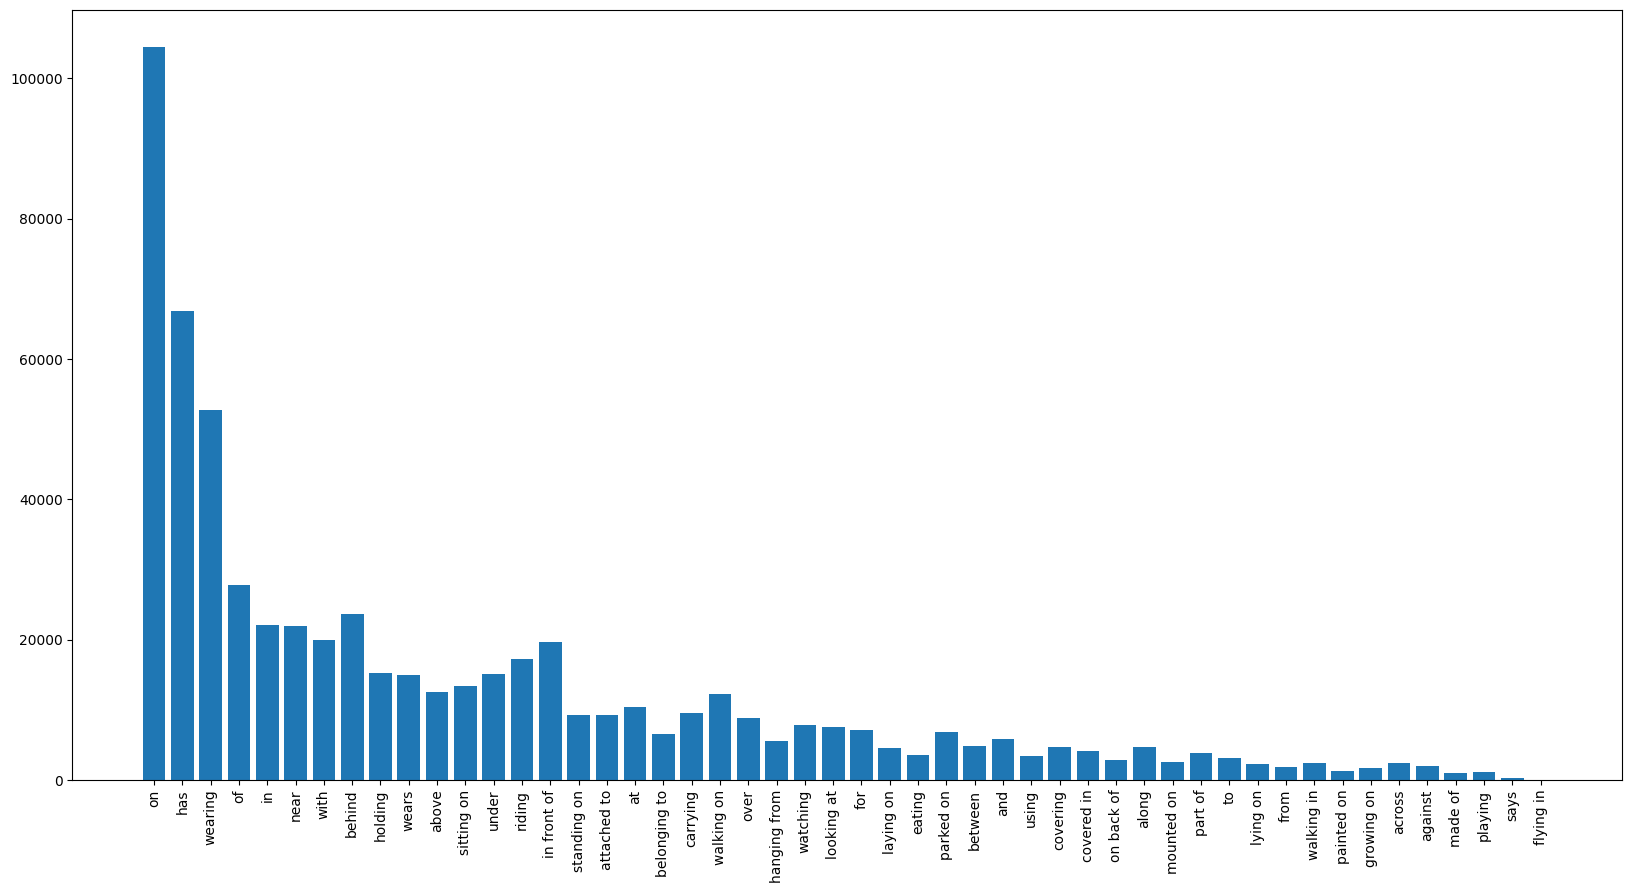

In [14]:
# plot the distribution of predicates in the dataset
plt.figure(figsize=(20,10))
x = np.array(list(pred_count_bal.keys()))
idx = [np.where(x == pred)[0][0] for pred in pred_strs]
x = x[idx]
y = np.array(list(pred_count_bal.values()))[idx]
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()
